修改前程序非常卡

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from ipywidgets import interactive, FloatSlider, HBox, VBox, FloatText
from IPython.display import display

# 设置连杆长度
l1 = 1.0  # 连杆1长度
l2 = 0.5  # 连杆2长度

# 计算连杆末端位置的正运动学函数
def forward_kinematics(theta1, theta2):
    theta1 = np.radians(theta1)
    theta2 = np.radians(theta2)
    
    # 第一个关节的位置
    x1 = l1 * np.cos(theta1)
    y1 = l1 * np.sin(theta1)
    
    # 末端执行器的位置
    x2 = x1 + l2 * np.cos(theta1 + theta2)
    y2 = y1 + l2 * np.sin(theta1 + theta2)
    
    return x1, y1, x2, y2

# 添加角度绘制的辅助函数
def plot_angle(ax, center, theta1, theta2, radius=0.3, label=None, color='black'):
    # 绘制圆弧表示角度
    arc = Arc(center, radius*2, radius*2, angle=0, theta1=theta1, theta2=theta2+theta1, color=color, lw=2)
    ax.add_patch(arc)
    
    # 计算起始边和终止边的端点
    start_x = center[0] + radius * np.cos(np.radians(theta1))
    start_y = center[1] + radius * np.sin(np.radians(theta1))
    end_x = center[0] + radius * np.cos(np.radians(theta1 + theta2))
    end_y = center[1] + radius * np.sin(np.radians(theta1 + theta2))
    
    # 绘制角度的初始边和终止边
    ax.plot([center[0], start_x], [center[1], start_y], color=color, lw=1, linestyle='--')  # 初始边
    ax.plot([center[0], end_x], [center[1], end_y], color=color, lw=1, linestyle='--')  # 终止边
    
    # 标注角度的标签
    if label:
        ax.text(center[0] + radius * 1.1, center[1], label, fontsize=12, color=color, ha='center', va='center')


# 绘制函数，用于更新图形
def plot_robot(theta1, theta2):
    x1, y1, x2, y2 = forward_kinematics(theta1, theta2)
    
    # 清除前一帧
    plt.clf()
    
    fig, ax = plt.subplots()
    
    # 设置绘图区域和坐标系限制
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    
    # 添加X轴和Y轴的标签
    ax.set_xlabel(r'$X$', fontsize=12)
    ax.set_ylabel(r'$Y$', fontsize=12)

    # 绘制X轴和Y轴
    ax.axhline(0, color='black', linewidth=0.5)  # X轴
    ax.axvline(0, color='black', linewidth=0.5)  # Y轴
    
    delta = 0.1    
    # 绘制机器人连杆
    ax.plot([0, x1, x2], [0, y1, y2], 'o-', lw=4)
    
    # 标注P0、P1、P2点的位置
    ax.text(0, 0 + delta, r'$P_0$', fontsize=12, ha='right', color='blue')  # 原点 P0
    ax.text(x1, y1 + delta, r'$P_1$', fontsize=12, ha='right', color='red')  # 关节点 P1
    ax.text(x2 + delta, y2 + delta, r'$P_2$', fontsize=12, ha='right', color='green')  # 末端执行器 P2
    
    # 绘制并标注连杆长度
    ax.text(x1 / 2, y1 / 2 + delta, r'$l_1$', fontsize=12, color='purple')  # 标注连杆1的长度
    ax.text((x1 + x2) / 2, (y1 + y2) / 2 + delta, r'$l_2$', fontsize=12, color='orange')  # 标注连杆2的长度
    
    # 绘制关键点
    ax.plot([x1], [y1], 'ro')  # 关节1
    ax.plot([x2], [y2], 'bo')  # 末端执行器
    
    # 绘制 P1 和 P2 点的投影线
    ax.plot([x1, x1], [0, y1], 'r--')  # P1到X轴的投影线
    ax.plot([0, x1], [y1, y1], 'r--')  # P1到Y轴的投影线
    ax.plot([x2, x2], [0, y2], 'b--')  # P2到X轴的投影线
    ax.plot([0, x2], [y2, y2], 'b--')  # P2到Y轴的投影线

    # 使用 LaTeX 渲染投影点
    ax.text(x1, 0 - delta * 2, r'$P_{1_x}=%.2f$' % x1, fontsize=10, ha='center', color='red')
    ax.text(0 - delta * 2, y1, r'$P_{1_y}=%.2f$' % y1, fontsize=10, va='center', color='red')
    ax.text(x2, 0 - delta * 2, r'$P_{2_x}=%.2f$' % x2, fontsize=10, ha='center', color='blue')
    ax.text(0 - delta * 2, y2, r'$P_{2_y}=%.2f$' % y2, fontsize=10, va='center', color='blue')

    # 绘制角度
    plot_angle(ax, (0, 0), 0, theta1, label=r'$\theta_1$', color='purple')
    plot_angle(ax, (x1, y1), theta1, theta2, label=r'$\theta_2$', color='orange')
    
    ax.set_title(r'$\theta_1$: %.2f°, $\theta_2$: %.2f°' % (theta1, theta2))
    
    # 显示图像
    plt.show()

# 创建滑块和输入框组合的交互控件
joint0_t0 = 53
joint1_t0 = -26
theta1_slider = FloatSlider(min=-180, max=180, step=1, value=joint0_t0, description='Theta1')
theta1_input = FloatText(value=joint0_t0)
theta1_box = HBox([theta1_slider, theta1_input])

theta2_slider = FloatSlider(min=-180, max=180, step=1, value=joint1_t0, description='Theta2')
theta2_input = FloatText(value=joint1_t0)
theta2_box = HBox([theta2_slider, theta2_input])

# 将滑块与输入框联动
def update_theta1(*args):
    theta1_input.value = theta1_slider.value
def update_slider1(*args):
    theta1_slider.value = theta1_input.value

def update_theta2(*args):
    theta2_input.value = theta2_slider.value
def update_slider2(*args):
    theta2_slider.value = theta2_input.value

theta1_slider.observe(update_theta1, 'value')
theta1_input.observe(update_slider1, 'value')

theta2_slider.observe(update_theta2, 'value')
theta2_input.observe(update_slider2, 'value')

# 组合滑块与输入框的交互
interactive_plot = interactive(plot_robot, theta1=theta1_slider, theta2=theta2_slider)
display(interactive_plot) 

interactive(children=(FloatSlider(value=53.0, description='Theta1', max=180.0, min=-180.0, step=1.0), FloatSli…

改成了全局变量之后程序流畅

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from ipywidgets import interactive, FloatSlider, HBox, VBox, FloatText
from IPython.display import display

# 设置连杆长度
l1 = 1.0  # 连杆1长度
l2 = 0.5  # 连杆2长度

# 计算连杆末端位置的正运动学函数
def forward_kinematics(theta1, theta2):
    theta1 = np.radians(theta1)
    theta2 = np.radians(theta2)
    
    # 第一个关节的位置
    x1 = l1 * np.cos(theta1)
    y1 = l1 * np.sin(theta1)
    
    # 末端执行器的位置
    x2 = x1 + l2 * np.cos(theta1 + theta2)
    y2 = y1 + l2 * np.sin(theta1 + theta2)
    
    return x1, y1, x2, y2

# 添加角度绘制的辅助函数
def plot_angle(ax, center, theta1, theta2, radius=0.3, label=None, color='black'):
    # 绘制圆弧表示角度
    arc = Arc(center, radius*2, radius*2, angle=0, theta1=theta1, theta2=theta2+theta1, color=color, lw=2)
    ax.add_patch(arc)
    
    # 计算起始边和终止边的端点
    start_x = center[0] + radius * np.cos(np.radians(theta1))
    start_y = center[1] + radius * np.sin(np.radians(theta1))
    end_x = center[0] + radius * np.cos(np.radians(theta1 + theta2))
    end_y = center[1] + radius * np.sin(np.radians(theta1 + theta2))
    
    # 绘制角度的初始边和终止边
    ax.plot([center[0], start_x], [center[1], start_y], color=color, lw=1, linestyle='--')  # 初始边
    ax.plot([center[0], end_x], [center[1], end_y], color=color, lw=1, linestyle='--')  # 终止边
    
    # 标注角度的标签
    if label:
        ax.text(center[0] + radius * 1.1, center[1], label, fontsize=12, color=color, ha='center', va='center')


# 绘制函数，用于更新图形
def plot_robot(theta1, theta2):
    x1, y1, x2, y2 = forward_kinematics(theta1, theta2)
    
    fig, ax = plt.subplots()  # 创建新的绘图上下文
    
    # 设置绘图区域和坐标系限制
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    
    # 添加X轴和Y轴的标签
    ax.set_xlabel(r'$X$', fontsize=12)
    ax.set_ylabel(r'$Y$', fontsize=12)

    # 绘制X轴和Y轴
    ax.axhline(0, color='black', linewidth=0.5)  # X轴
    ax.axvline(0, color='black', linewidth=0.5)  # Y轴
    
    delta = 0.1    
    # 绘制机器人连杆
    ax.plot([0, x1, x2], [0, y1, y2], 'o-', lw=4)
    
    # 标注P0、P1、P2点的位置
    ax.text(0, 0 + delta, r'$P_0$', fontsize=12, ha='right', color='blue')  # 原点 P0
    ax.text(x1, y1 + delta, r'$P_1$', fontsize=12, ha='right', color='red')  # 关节点 P1
    ax.text(x2 + delta, y2 + delta, r'$P_2$', fontsize=12, ha='right', color='green')  # 末端执行器 P2
    
    # 绘制并标注连杆长度
    ax.text(x1 / 2, y1 / 2 + delta, r'$l_1$', fontsize=12, color='purple')  # 标注连杆1的长度
    ax.text((x1 + x2) / 2, (y1 + y2) / 2 + delta, r'$l_2$', fontsize=12, color='orange')  # 标注连杆2的长度
    
    # 绘制关键点
    ax.plot([x1], [y1], 'ro')  # 关节1
    ax.plot([x2], [y2], 'bo')  # 末端执行器
    
    # 绘制 P1 和 P2 点的投影线
    ax.plot([x1, x1], [0, y1], 'r--')  # P1到X轴的投影线
    ax.plot([0, x1], [y1, y1], 'r--')  # P1到Y轴的投影线
    ax.plot([x2, x2], [0, y2], 'b--')  # P2到X轴的投影线
    ax.plot([0, x2], [y2, y2], 'b--')  # P2到Y轴的投影线

    # 使用 LaTeX 渲染投影点
    ax.text(x1, 0 - delta * 2, r'$P_{1_x}=%.2f$' % x1, fontsize=10, ha='center', color='red')
    ax.text(0 - delta * 2, y1, r'$P_{1_y}=%.2f$' % y1, fontsize=10, va='center', color='red')
    ax.text(x2, 0 - delta * 2, r'$P_{2_x}=%.2f$' % x2, fontsize=10, ha='center', color='blue')
    ax.text(0 - delta * 2, y2, r'$P_{2_y}=%.2f$' % y2, fontsize=10, va='center', color='blue')

    # 绘制角度
    plot_angle(ax, (0, 0), 0, theta1, label=r'$\theta_1$', color='purple')
    plot_angle(ax, (x1, y1), theta1, theta2, label=r'$\theta_2$', color='orange')
    
    ax.set_title(r'$\theta_1$: %.2f°, $\theta_2$: %.2f°' % (theta1, theta2))
    
    # 显示图像
    plt.show()

# 创建滑块和输入框组合的交互控件
joint0_t0 = 53
joint1_t0 = -26
theta1_slider = FloatSlider(min=-180, max=180, step=1, value=joint0_t0, description='Theta1')
theta1_input = FloatText(value=joint0_t0)
theta1_box = HBox([theta1_slider, theta1_input])

theta2_slider = FloatSlider(min=-180, max=180, step=1, value=joint1_t0, description='Theta2')
theta2_input = FloatText(value=joint1_t0)
theta2_box = HBox([theta2_slider, theta2_input])

# 将滑块与输入框联动
def update_theta1(*args):
    theta1_input.value = theta1_slider.value
def update_slider1(*args):
    theta1_slider.value = theta1_input.value

def update_theta2(*args):
    theta2_input.value = theta2_slider.value
def update_slider2(*args):
    theta2_slider.value = theta2_input.value

theta1_slider.observe(update_theta1, 'value')
theta1_input.observe(update_slider1, 'value')

theta2_slider.observe(update_theta2, 'value')
theta2_input.observe(update_slider2, 'value')

# 组合滑块与输入框的交互
interactive_plot = interactive(plot_robot, theta1=theta1_slider, theta2=theta2_slider)
display(interactive_plot)


interactive(children=(FloatSlider(value=53.0, description='Theta1', max=180.0, min=-180.0, step=1.0), FloatSli…

如何绘制负数的角度，主要考虑修改arc = Arc(center, radius*2, radius*2, angle=0, theta1=theta1, theta2=theta2+theta1, color=color, lw=2)
改为arc = Arc(center, radius*2, radius*2, angle=0, theta1=theta2+theta1, theta2=theta1, color=color, lw=2)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from ipywidgets import interactive, FloatSlider, HBox, VBox, FloatText
from IPython.display import display

# 设置连杆长度
l1 = 1.0  # 连杆1长度
l2 = 0.5  # 连杆2长度

# 计算连杆末端位置的正运动学函数
def forward_kinematics(theta1, theta2):
    theta1 = np.radians(theta1)
    theta2 = np.radians(theta2)
    
    # 第一个关节的位置
    x1 = l1 * np.cos(theta1)
    y1 = l1 * np.sin(theta1)
    
    # 末端执行器的位置
    x2 = x1 + l2 * np.cos(theta1 + theta2)
    y2 = y1 + l2 * np.sin(theta1 + theta2)
    
    return x1, y1, x2, y2

# 添加角度绘制的辅助函数
def plot_angle(ax, center, theta1, theta2, radius=0.3, label=None, color='black'):
    # 绘制圆弧表示角度
    if theta2>=0:
        arc = Arc(center, radius*2, radius*2, angle=0, theta1=theta1, theta2=theta2+theta1, color=color, lw=2)
    else :
        arc = Arc(center, radius*2, radius*2, angle=0, theta1=theta2+theta1, theta2=theta1, color=color, lw=2)
    ax.add_patch(arc)
    
    # 计算起始边和终止边的端点
    start_x = center[0] + radius * np.cos(np.radians(theta1))
    start_y = center[1] + radius * np.sin(np.radians(theta1))
    end_x = center[0] + radius * np.cos(np.radians(theta1 + theta2))
    end_y = center[1] + radius * np.sin(np.radians(theta1 + theta2))
    
    # 绘制角度的初始边和终止边
    ax.plot([center[0], start_x], [center[1], start_y], color=color, lw=1, linestyle='--')  # 初始边
    ax.plot([center[0], end_x], [center[1], end_y], color=color, lw=1, linestyle='--')  # 终止边
    
    # 标注角度的标签
    if label:
        ax.text(center[0] + radius * 1.1, center[1], label, fontsize=12, color=color, ha='center', va='center')


# 绘制函数，用于更新图形
def plot_robot(theta1, theta2):
    x1, y1, x2, y2 = forward_kinematics(theta1, theta2)
    
    fig, ax = plt.subplots()  # 创建新的绘图上下文
    
    # 设置绘图区域和坐标系限制
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    
    # 添加X轴和Y轴的标签
    ax.set_xlabel(r'$X$', fontsize=12)
    ax.set_ylabel(r'$Y$', fontsize=12)

    # 绘制X轴和Y轴
    ax.axhline(0, color='black', linewidth=0.5)  # X轴
    ax.axvline(0, color='black', linewidth=0.5)  # Y轴
    
    delta = 0.1    
    # 绘制机器人连杆
    ax.plot([0, x1, x2], [0, y1, y2], 'o-', lw=4)
    
    # 标注P0、P1、P2点的位置
    ax.text(0, 0 + delta, r'$P_0$', fontsize=12, ha='right', color='blue')  # 原点 P0
    ax.text(x1, y1 + delta, r'$P_1$', fontsize=12, ha='right', color='red')  # 关节点 P1
    ax.text(x2 + delta, y2 + delta, r'$P_2$', fontsize=12, ha='right', color='green')  # 末端执行器 P2
    
    # 绘制并标注连杆长度
    ax.text(x1 / 2, y1 / 2 + delta, r'$l_1$', fontsize=12, color='purple')  # 标注连杆1的长度
    ax.text((x1 + x2) / 2, (y1 + y2) / 2 + delta, r'$l_2$', fontsize=12, color='orange')  # 标注连杆2的长度
    
    # 绘制关键点
    ax.plot([x1], [y1], 'ro')  # 关节1
    ax.plot([x2], [y2], 'bo')  # 末端执行器
    
    # 绘制 P1 和 P2 点的投影线
    ax.plot([x1, x1], [0, y1], 'r--')  # P1到X轴的投影线
    ax.plot([0, x1], [y1, y1], 'r--')  # P1到Y轴的投影线
    ax.plot([x2, x2], [0, y2], 'b--')  # P2到X轴的投影线
    ax.plot([0, x2], [y2, y2], 'b--')  # P2到Y轴的投影线

    # 使用 LaTeX 渲染投影点
    ax.text(x1, 0 - delta * 2, r'$P_{1_x}=%.2f$' % x1, fontsize=10, ha='center', color='red')
    ax.text(0 - delta * 2, y1, r'$P_{1_y}=%.2f$' % y1, fontsize=10, va='center', color='red')
    ax.text(x2, 0 - delta * 2, r'$P_{2_x}=%.2f$' % x2, fontsize=10, ha='center', color='blue')
    ax.text(0 - delta * 2, y2, r'$P_{2_y}=%.2f$' % y2, fontsize=10, va='center', color='blue')

    # 绘制角度
    plot_angle(ax, (0, 0), 0, theta1, label=r'$\theta_1$', color='purple')
    plot_angle(ax, (x1, y1), theta1, theta2, label=r'$\theta_2$', color='orange')
    
    ax.set_title(r'$\theta_1$: %.2f°, $\theta_2$: %.2f°' % (theta1, theta2))
    
    # 显示图像
    plt.show()

# 创建滑块和输入框组合的交互控件
joint0_t0 = 53
joint1_t0 = -26
theta1_slider = FloatSlider(min=-180, max=180, step=1, value=joint0_t0, description='Theta1')
theta1_input = FloatText(value=joint0_t0)
theta1_box = HBox([theta1_slider, theta1_input])

theta2_slider = FloatSlider(min=-180, max=180, step=1, value=joint1_t0, description='Theta2')
theta2_input = FloatText(value=joint1_t0)
theta2_box = HBox([theta2_slider, theta2_input])

# 将滑块与输入框联动
def update_theta1(*args):
    theta1_input.value = theta1_slider.value
def update_slider1(*args):
    theta1_slider.value = theta1_input.value

def update_theta2(*args):
    theta2_input.value = theta2_slider.value
def update_slider2(*args):
    theta2_slider.value = theta2_input.value

theta1_slider.observe(update_theta1, 'value')
theta1_input.observe(update_slider1, 'value')

theta2_slider.observe(update_theta2, 'value')
theta2_input.observe(update_slider2, 'value')

# 组合滑块与输入框的交互
interactive_plot = interactive(plot_robot, theta1=theta1_slider, theta2=theta2_slider)
display(interactive_plot)


interactive(children=(FloatSlider(value=53.0, description='Theta1', max=180.0, min=-180.0, step=1.0), FloatSli…

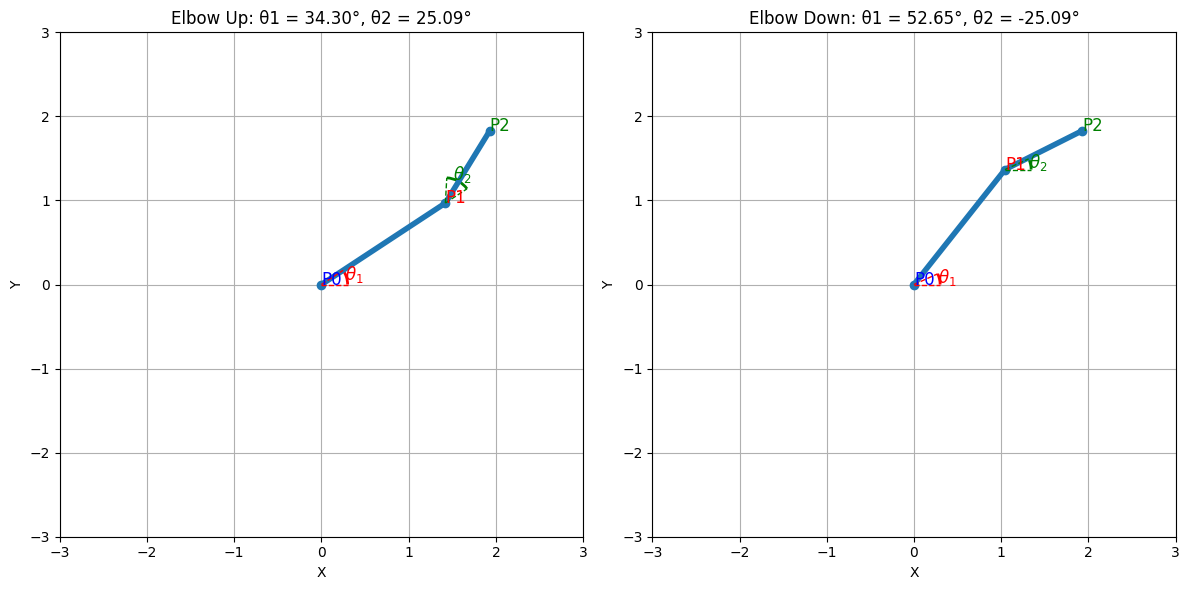

In [9]:
from robot_kinematics import plot_robot_inverse# 示例：给定末端执行器的位置
x = 1.93
y = 1.83

# 绘制机器人两种不同的逆运动学解
plot_robot_inverse(x, y)